<a href="https://colab.research.google.com/github/belyakov23/intro-ml-projects-/blob/main/twitter_sentiment_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Twitter Sentiment Classification (NLP)

This project uses a Kaggle Twitter entity-level sentiment dataset to classify tweets into four classes: Irrelevant, Negative, Neutral, and Positive, based on the tweet text. The data contains tweet IDs, entities, sentiment labels, and tweet content.

I load the CSV with pandas, fix the column names, drop rows with missing text or labels, and split the data into training and test sets. The text is transformed into TF-IDF features and fed into a Logistic Regression classifier inside a scikit-learn Pipeline.

Model performance on the test set reaches about 74% accuracy, with class F1-scores between 0.67 (Irrelevant) up to 0.78 (Negative) and balanced macro and weighted averages around 0.73–0.74. I also generate a confusion matrix heatmap to visualise how well the model distinguishes between the four sentiment classes.


In [7]:
!pip install -q kagglehub

import kagglehub
import os
import pandas as pd

# Download latest version of the dataset
path = kagglehub.dataset_download(
    "jp797498e/twitter-entity-sentiment-analysis"
)

print("Path to dataset files:", path)
print(os.listdir(path))

csv_path = os.path.join(path, "twitter_training.csv")
df = pd.read_csv(csv_path, header=None, names=["id", "entity", "sentiment", "text"])

df.head()




Using Colab cache for faster access to the 'twitter-entity-sentiment-analysis' dataset.
Path to dataset files: /kaggle/input/twitter-entity-sentiment-analysis
['twitter_validation.csv', 'twitter_training.csv']


,id,entity,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [8]:
df.columns = ["tweet_id", "entity", "sentiment", "tweet_content"]

df.head()
df.columns
df["sentiment"].value_counts()


,count
sentiment,
Negative,22542
Positive,20832
Neutral,18318
Irrelevant,12990


In [9]:
df = df.dropna(subset=["tweet_content", "sentiment"])

df = df.reset_index(drop=True)

df.shape
df["tweet_content"].isna().sum(), df["sentiment"].isna().sum()


(np.int64(0), np.int64(0))

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

X = df["tweet_content"]
y = df["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = Pipeline([
    ("tfidf", TfidfVectorizer(stop_words="english", max_features=10000)),
    ("clf", LogisticRegression(max_iter=1000))
])

model.fit(X_train, y_train)


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=10000, stop_words='english')),
                ('clf', LogisticRegression(max_iter=1000))])

              precision    recall  f1-score   support

  Irrelevant       0.76      0.60      0.67      2575
    Negative       0.73      0.84      0.78      4472
     Neutral       0.75      0.69      0.72      3622
    Positive       0.73      0.77      0.75      4131

    accuracy                           0.74     14800
   macro avg       0.74      0.72      0.73     14800
weighted avg       0.74      0.74      0.74     14800



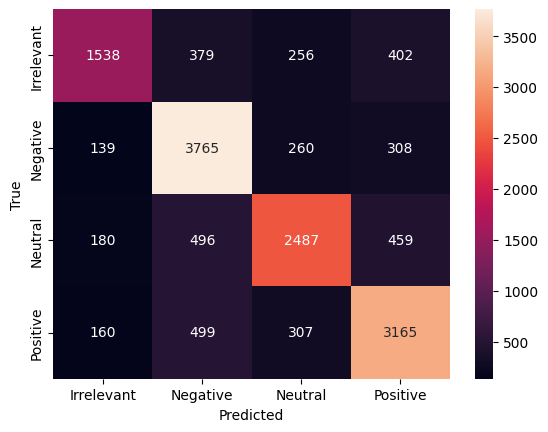

In [11]:
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
